# <span style="color:black"> LSN-Esercitazione numerica 9</span>


## <span style="color:blue">  Esercizio 09.1</span>

Per questa esercitazione ho scritto un codice che vada a risolvere il problema del commesso viaggiatore attraverso un **algoritmo genetico**; si è scelta come popolazione una gruppo di 100 percorsi fra 32 città, dove ognuno corrisponde a un diverso cromosoma.

La "bontà" di un percorso è giudicata in base alla lunghezza del tragitto che unisce le città secondo quel percorso. Per valutare, quindi, un elemento della popolazione è stata introdotta una ***funzione costo*** in base alla quale sia possibile ordinare la popolazione a partire dall'elemento che presenta il tragitto più breve fino a quello che presenta il tragitto più lungo. La funzione costo utilizzata è la somma in quadratura delle distanze tra città successive:
$$  L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2  $$   

Il codice, dopo il settaggio della generatore di numeri casuali, la lettura dei parametri di input e la generazione delle coordinate delle città, è costituito da un serie successica di iterazioni, dove ognuna corrisponde a:
* $\textbf{Selezione}$: estrazione di una traiettoria padre e una madre con probabilità proporzionale all'inverso di una potenza della funzione costo calcolata sul percorso;
* $\textbf{Crossover}$: applicazione del crossover con una probabilità associata e conseguente generazione di due figli; se non avviene il processo ho pensato di estrarre dalla popolazione due traiettorie figlie "fittizie" con una distribuzione gaussiana descritta da valor medio e varianza legate a delle opportune frazioni della lunghezza del percorso, oppure di restituire come figli i due genitori, senza alcuna modifica.
* $\textbf{Mutazione}$: applicazione delle mutazioni ai due figli, ognuna con una probabilità associata; ogni figlio può mutare zero, una o più volte fino al caso in cui subisce tutte e quattro le mutazioni (le mutazioni implementate sono la permutazione di un elemento, l'inversione, lo shift e la permutazione di un numero m di elementi; inoltre vi è la probabilità di chiamare la funzione $elitary()$ che prende il percorso elitario, con funzione costo minima, e lo aggiunge alla popolazione escludendo il peggiore).
* $\textbf{Update}$: ordinamento della popolazione e aggiornamento di essa con i nuovi figli mutati se essi hanno una funzione costo minore di almeno un membro della popolazione.

Ho anche implementato una funzione $\textbf{Check}$ che controlli che la popolazione sia costituita da traiettorie dove ogni città si presenta e una sola volta e che la città 1 sia sempre in prima posizione (scelta fatta per ridurre la degenerazione della funzione costo del migliore percoso a 2, legata solamente al senso di percorrenza).
Si è notato come, soprattutto nella ricerca del percorso migliore fra le città disposte all'interno di un quadrato, il raggiungimento del minimo dipenda fortemente della scelta della probabilità di crossover e mutazioni e dall'opportuna scelta della selezione: ho trovato come buona scelta  quella di selezionare con una probabilià proporzionale all'inverso del cubo della funzione costo, di restituire i genitori immutati dopo il fallimento del crossover e di scegliere un set di probabilità qui elencato: 
* $p_{cr}=0.8$;
* $p_{perm-1}=0.2$;
* $p_{shift}=0.3$;
* $p_{inv}=0.2$;
* $p_{perm-m}=0.3$;
* $p_{elite}=0$.

Per molte altre scelte, l'algoritmo si arresta in configurazioni di minimo locale.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

In [2]:
n, L, Lbest= np.loadtxt('./Circ/Evolution.res', usecols=(0,1,2), unpack='true')
nq, Lq, Lbestq= np.loadtxt('./Quad/Evolution.res', usecols=(0,1,2), unpack='true')

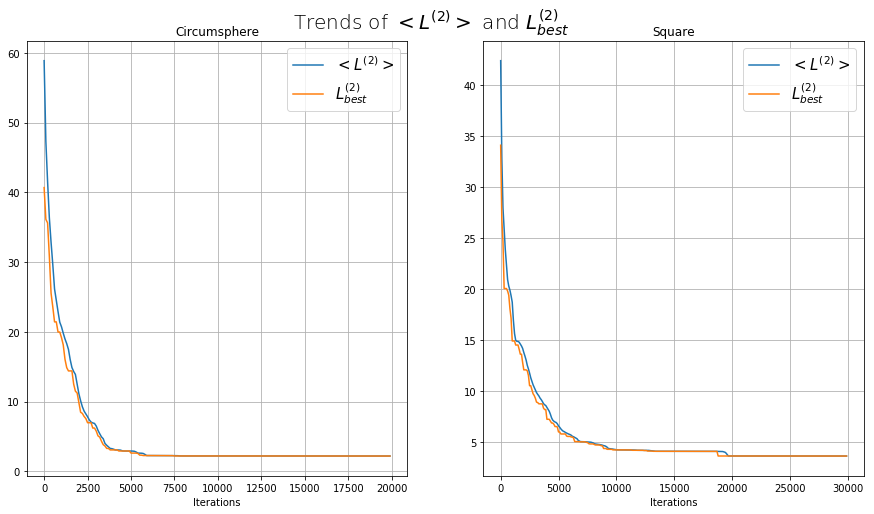

In [4]:
fig = plt.figure(figsize=(15, 8))
fig.suptitle('Trends of $<L^{(2)}>$ and $L^{(2)}_{best}$', y='0.94', size='20', weight='20')
gs = gridspec.GridSpec(1, 2, figure=fig)

ax = fig.add_subplot(gs[0,0])
plt.plot(n, L, label="$<L^{(2)}>$");
plt.plot(n, Lbest, label="$L^{(2)}_{best}$")
plt.xlabel('Iterations')
ax.legend(fontsize=15)
plt.grid()
plt.title('Circumsphere')

ax2 = fig.add_subplot(gs[0,1])
plt.plot(nq, Lq, label="$<L^{(2)}>$");
plt.plot(nq, Lbestq, label="$L^{(2)}_{best}$")
plt.xlabel('Iterations')
ax2.legend(fontsize=15)
plt.grid()
plt.title('Square')

plt.show()

Ho plottato, per le configurazioni formate da città lungo una circonferenza e all'interno di un quadrato, l'andamento del valore della funzione costo migliore e di quella mediata sulla miglior metà della popolazione, in funzione del numero di iterazioni. Mentre per la circonferenza la convergenza è raggiunta prima di 10000 iterazioni, per il quadrato sono richieste quasi 20000 iterazioni per uscire da un minimo locale.

In [5]:
x, y = np.loadtxt('./Circ/Best_coordinates.res', usecols=(0,1), unpack=True)
xq, yq = np.loadtxt('./Quad/Best_coordinates.res', usecols=(0,1), unpack=True)

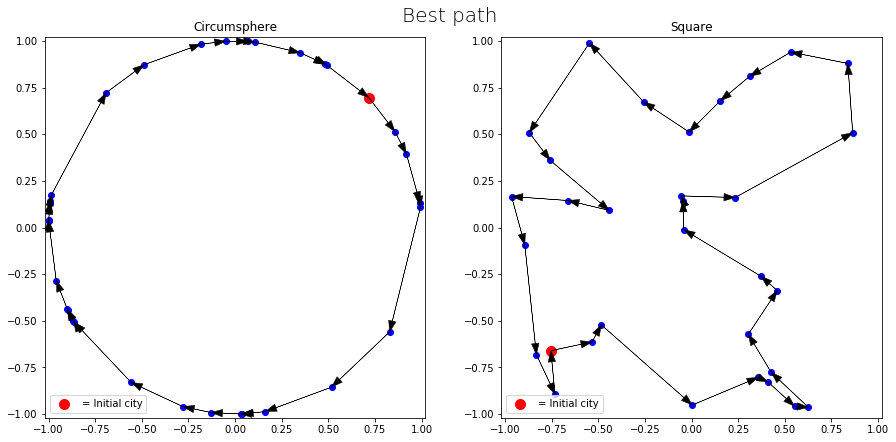

In [6]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Best path', y='0.94', size='20', weight='20')
gs = gridspec.GridSpec(1, 2, figure=fig)

ax = fig.add_subplot(gs[0,0])
for i in range(len(x)):
    if i==0:
        plt.scatter(x[i],y[i], marker='.', s=400, color='red', label='= Initial city')
    else:
        plt.scatter(x[i],y[i], color='blue')
    if i<len(x)-1:
        plt.arrow(x[i], y[i], x[i+1]-x[i], y[i+1]-y[i], width=0, head_width=0.04,length_includes_head=True, lw=0.5, fc="black", ec='black')
    else:
        plt.arrow(x[i], y[i], x[0]-x[i], y[0]-y[i], width=0, head_width=0.04,length_includes_head=True, lw=0.5, fc="black", ec='black')
plt.xlim(-1.02,1.02)
plt.ylim(-1.02,1.02)
ax.legend(loc='lower left')
plt.title('Circumsphere')


ax2 = fig.add_subplot(gs[0,1])
for i in range(len(xq)):
    if i==0:
        plt.scatter(xq[i],yq[i], marker='.', s=400, color='red', label='= Initial city')
    else:
        plt.scatter(xq[i],yq[i], color='blue')
    if i<len(x)-1:
        plt.arrow(xq[i], yq[i], xq[i+1]-xq[i], yq[i+1]-yq[i], width=0, head_width=0.04,length_includes_head=True, lw=0.5, fc="black", ec='black')
    else:
        plt.arrow(xq[i], yq[i], xq[0]-xq[i], yq[0]-yq[i], width=0, head_width=0.04,length_includes_head=True, lw=0.5, fc="black", ec='black')
plt.xlim(-1.02,1.02)
plt.ylim(-1.02,1.02)
ax2.legend(loc='lower left')
plt.title('Square')
plt.show()

Dalle immagini riportate si ipotizza che il processo non si è arrestato in un minimo locale: ho, ovviamente, la certezza che questo sia avvenuto per la configurazione di città lungo la circonferenza, mentre per quella all'interno del quadrato mi affido semplicemente al fatto che il percorso finale sia "buono" almeno a vista.